In [1]:
#Importing Necessary Libraries

In [161]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [209]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


All the data is of numerical data type.
*Target Variable is W and this is Regression problem

Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

In [148]:
data.shape

(30, 17)

In [149]:
# We have 30 rows and 17 columns

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [151]:
#ERA column is of float datatype and all others are of integer data type

In [152]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Important Observations
* There is no missing values in any column -- We will check for the NAN later
* There is significant difference in quartile range of some columns, i.e., possibi;lity of outliers.

In [9]:
data.isnull().sum() #Checking Nulls in our Train Dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [10]:
# No Missing Values

# EDA

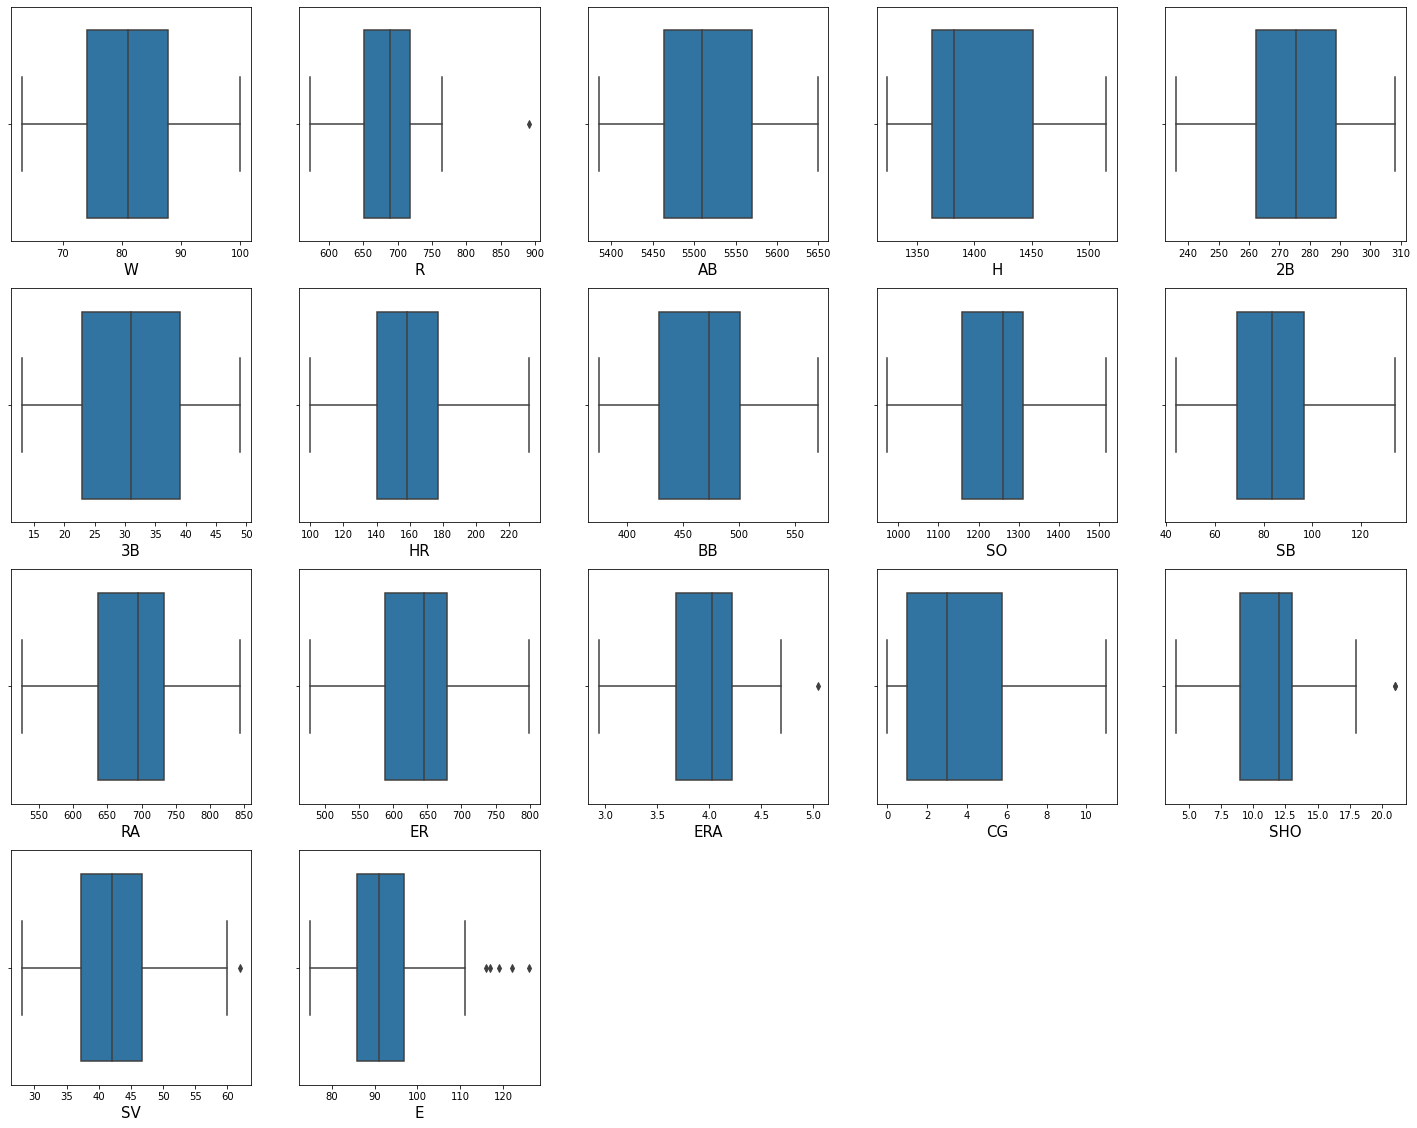

In [11]:
plt.figure(figsize = (25,25))
plotnumber = 1
for column in data:
    if plotnumber <= 25:
        ax = plt.subplot(5,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize = 15)
    plotnumber+=1
plt.show()

In [210]:
# Applying log transformation on columns having outliers
data['R'] = np.log(data['R'])
data['ERA'] = np.log(data['ERA'])
data['SHO'] = np.log(data['SHO'])
data['SV'] = np.log(data['SV'])
data['E'] = np.log(data['E'])

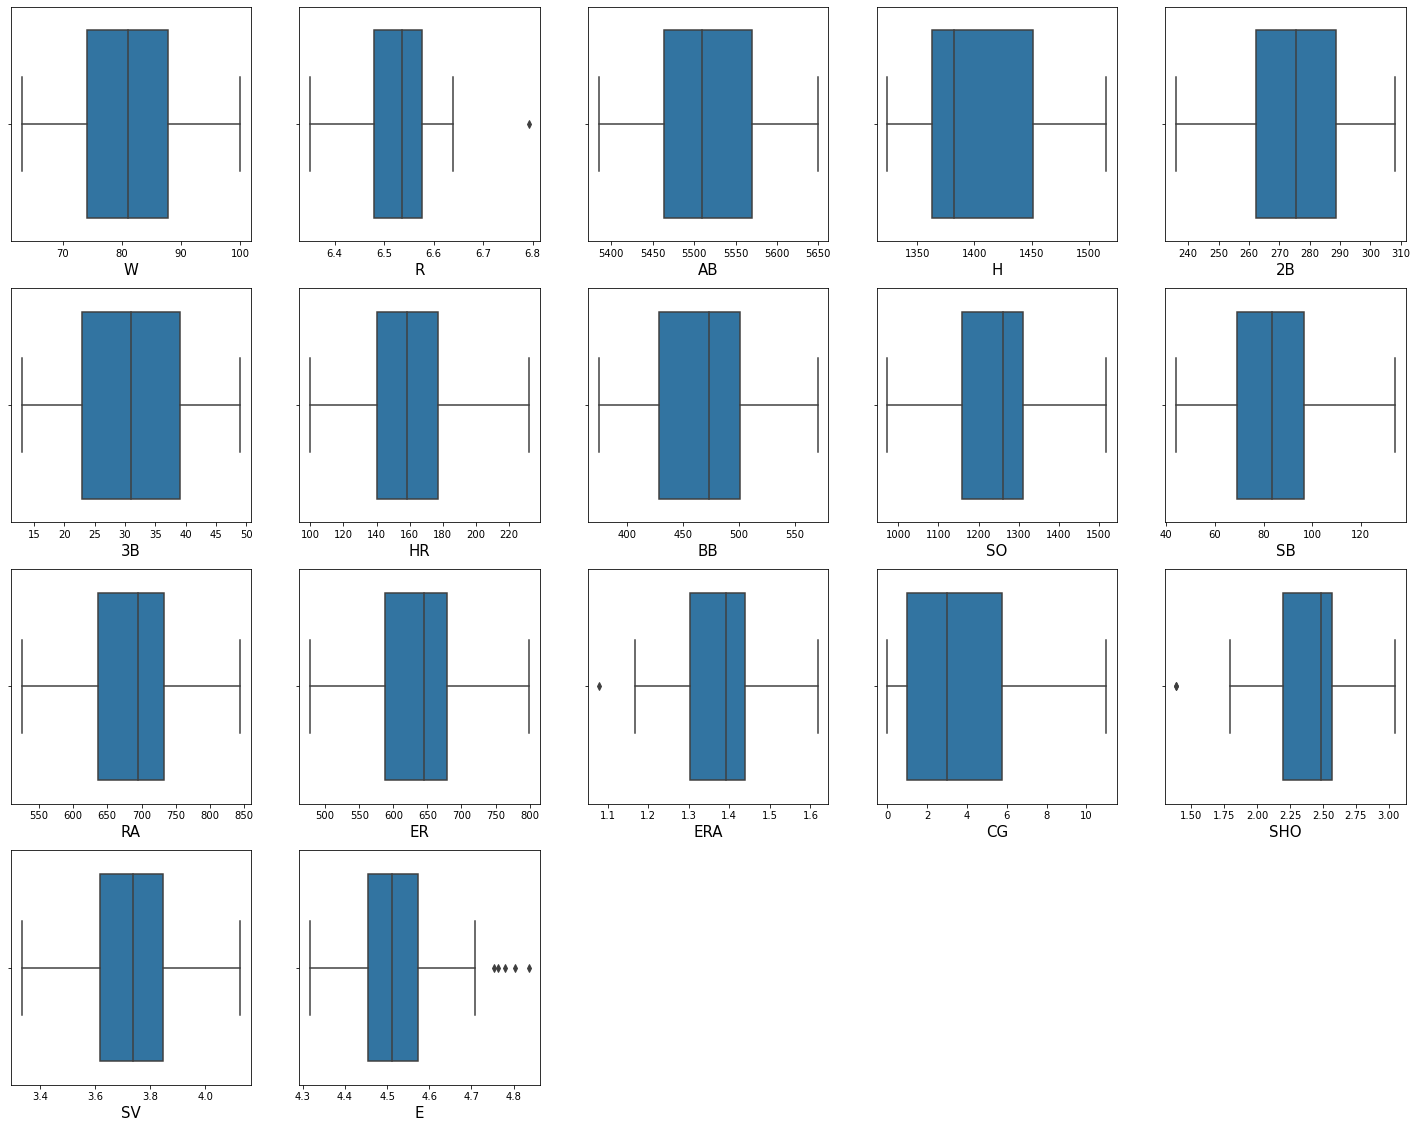

In [63]:
data.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.442824,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.824769,0.080533,0.429547,0.667961,-0.090235
R,0.442824,1.000000,0.338160,0.482974,0.566762,-0.045118,0.676426,0.395825,-0.030640,0.081067,-0.051796,-0.049386,-0.051751,0.226331,-0.127433,-0.075259,-0.015583
AB,-0.087947,0.338160,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.243093,-0.080876,-0.189467,-0.134297,0.322371
H,0.037612,0.482974,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.218070,0.147955,-0.122475,-0.151354,-0.036662
2B,0.427797,0.566762,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.268535,0.306675,0.074079,0.143614,0.109923
3B,-0.251118,-0.045118,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.305168,-0.065898,-0.067258,-0.185138,0.115261
HR,0.307407,0.676426,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.078685,0.156502,-0.076097,-0.004612,-0.198233
BB,0.484342,0.395825,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.453579,0.462478,0.353837,0.110706,-0.075696
SO,0.111850,-0.030640,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.197920,-0.093418,0.165705,0.156440,0.163813
SB,-0.157234,0.081067,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.123615,-0.020783,-0.088922,-0.197153,0.074715


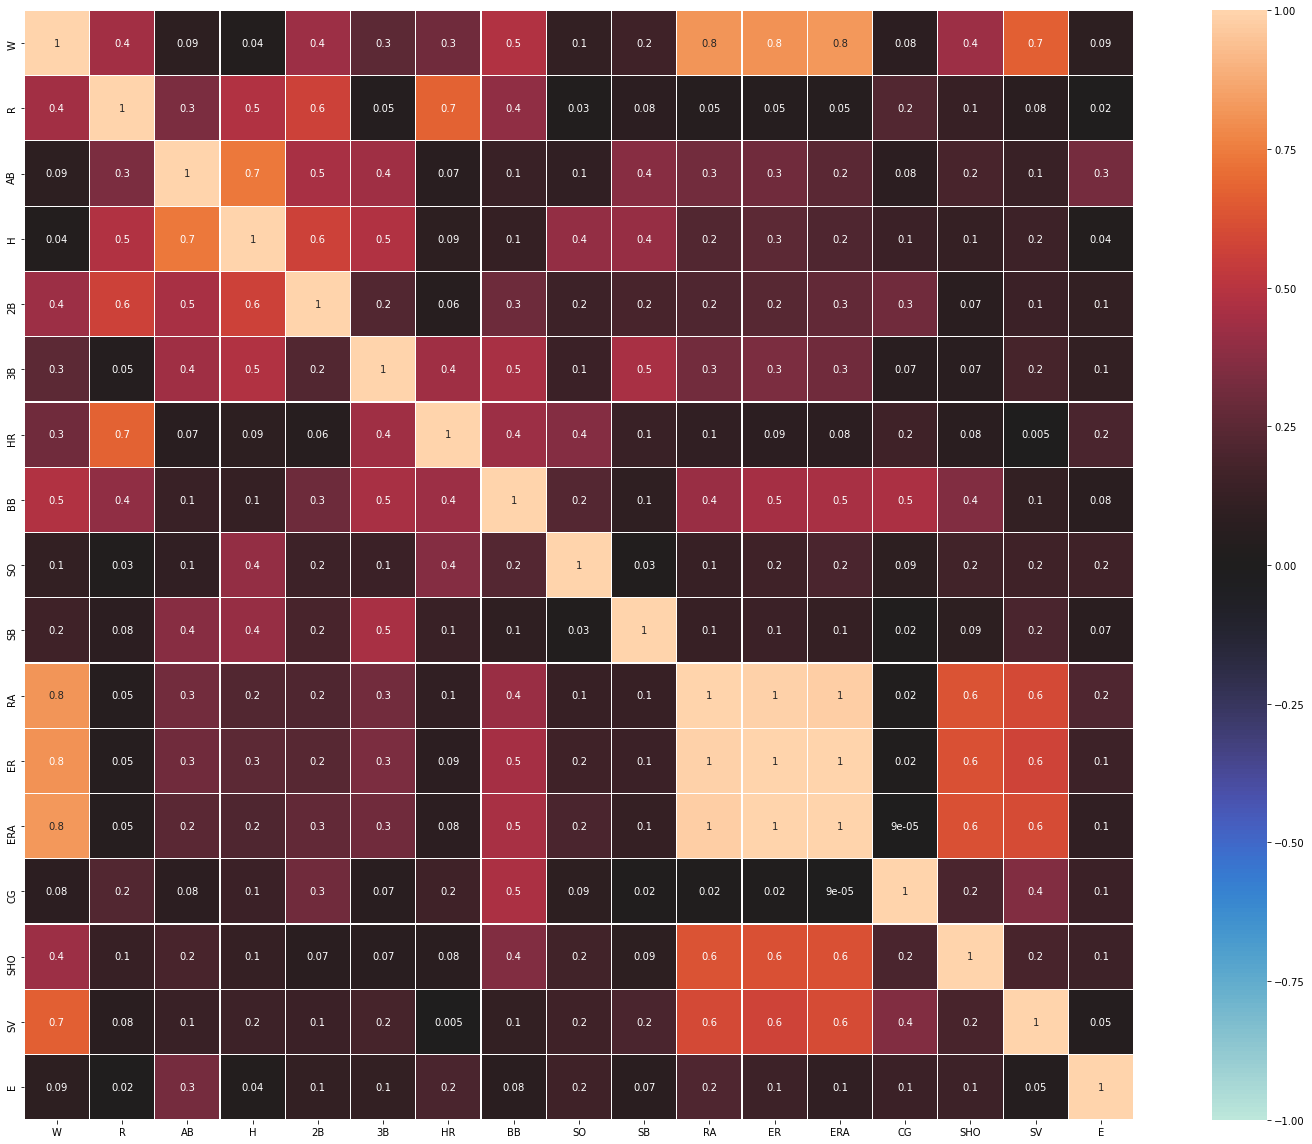

In [64]:
df_corr = data.corr().abs()
plt.figure(figsize = (22,16))
sns.heatmap(df_corr, vmin = -1, vmax = 1, annot = True, square = True, center = 0, fmt = '.1g', linewidths = .1)
plt.tight_layout()

In [211]:
# # data is multicollinear
x = data.drop(columns = ['W'], axis = 1)# Dividing our data into features and labels

y = data['W']

# Scaling

In [212]:
from sklearn.preprocessing import StandardScaler # Scaling our feature data
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [213]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaler,i) for i in range(x_scaler.shape[1])]
vif["Features"] = x.columns

In [214]:
vif

,vif,Features
0,15.790712,R
1,4.554786,AB
2,10.804798,H
3,3.756896,2B
4,3.940005,3B
5,11.990991,HR
6,3.845160,BB
7,2.772276,SO
8,1.949878,SB
9,166.688923,RA


In [215]:
# VIF also shows that there is multicollinearity in this dataset, 
# Let's drop RA and ER from our data

In [216]:
x = x.drop(columns = ['RA'], axis = 1)
x = x.drop(columns = ['ER'], axis = 1)

In [217]:
# x = data.drop(columns = ['W'], axis = 1)# Dividing our data into features and labels

# y = data['W']

In [218]:
# from sklearn.preprocessing import StandardScaler # Scaling our feature data
# scaler = StandardScaler()
# x_scaler = scaler.fit_transform(x)

# Train Test Split

In [219]:
x_train, x_test, y_train, y_test  = train_test_split(x_scaler,y,test_size = 0.30, random_state=1)

# Linear regression Model

In [220]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [221]:
regression.score(x_train, y_train)

0.9849792396150884

In [222]:
lr_pred = regression.predict(x_train)

In [223]:
regression.score(x_test, y_test)

0.8423304486904227

# Lasso Regression Model

In [224]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
lasscv = LassoCV(alphas = None, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [225]:
alpha = lasscv.alpha_ # finding alpha 
alpha

0.06655826637727486

In [226]:
lasso_reg = Lasso(alpha)  # Training our model with alpha
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.06655826637727486)

In [227]:
lasso_reg.score(x_train, y_train)

0.967418234686888

In [231]:
lassor_pred = lasso_reg.predict(x_test)

In [229]:
lasso_reg.score(x_test, y_test)

0.821703500799779

In [232]:
from sklearn import metrics
metrics.r2_score(y_test, lassor_pred) #R2_Score

0.821703500799779

# Ridge Regression Model

In [233]:
ridgecv = RidgeCV(alphas = np.arange(0.001, 0.1, 0.001), normalize = True)

In [234]:
ridgecv.fit(x_train, y_train) # Training for alpha

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [235]:
ridgecv.alpha_ # finding alpha

0.099

In [236]:
ridge_model  = Ridge(alpha = ridgecv.alpha_)
ridge_model.fit(x_train, y_train) # training our model with alpha

Ridge(alpha=0.099)

In [237]:
ridge_model.score(x_train, y_train)

0.9813114290177474

In [240]:
ridge_pred = ridge_model.predict(x_test)

In [241]:
metrics.r2_score(y_test, ridge_pred)# R2 Score

0.815744716523863

# Ada_Boost regression model

In [242]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()

In [243]:
ada.fit(x_train, y_train) # Model Training

AdaBoostRegressor()

In [244]:
ada.score(x_train, y_train)

0.9949252504187196

In [245]:
ada_pred = ada.predict(x_test) #prediction

In [246]:
from sklearn import metrics
metrics.r2_score(y_test, ada_pred)# R2 Score

0.7510949794146757

In [247]:
# Seeing at the difference in train and test scores, it is clear that overfitting lies.
# Let's use Bagging to deal with that

In [248]:
from sklearn.ensemble import BaggingRegressor
bag_ab = BaggingRegressor(ada, bootstrap = True, random_state = 3, oob_score  = True)

In [249]:
bag_ab.fit(x_train, y_train)
bag_ab.score(x_train, y_train)

0.8756201301048174

In [250]:
bag_ab_pred = bag_ab.predict(x_test)

In [251]:
bag_ab.score(x_test, y_test)

0.7226298281595616

In [252]:
metrics.r2_score(y_test, bag_ab_pred)

0.7226298281595616

# Random Forest regression

In [253]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth = 5)

In [254]:
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [255]:
rf.score(x_train, y_train)

0.9095439420845732

In [256]:
rf_y_pred = rf.predict(x_test)

In [257]:
metrics.r2_score(y_test, rf_y_pred)# R2 Score

0.6455117021371957

In [258]:
# Again it is showing that overfitting lies.
# Applying Bagging

In [259]:
bag_rf = BaggingRegressor(rf, bootstrap = True, random_state = 3, oob_score  = True)

In [260]:
bag_rf.fit(x_train, y_train)
bag_rf.score(x_train, y_train)

0.7820527957167052

In [262]:
bag_rf_y_pred = bag_rf.predict(x_test)

In [263]:
bag_rf.score(x_test, y_test)

0.6322766957608834

In [264]:
metrics.r2_score(y_test, bag_rf_y_pred)# R2 Score

0.6322766957608834

# Checking for the best model

In [265]:
R2_lr = metrics.r2_score(y_train, lr_pred)
R2_lr

0.9849792396150884

In [268]:
R2_lasso = metrics.r2_score(y_test, lassor_pred)
R2_lasso

0.821703500799779

In [269]:
R2_ridge = metrics.r2_score(y_test, ridge_pred)
R2_ridge

0.815744716523863

In [271]:
R2_ada = metrics.r2_score(y_test, ada_pred)
R2_ada

0.7510949794146757

In [272]:
R2_rf = metrics.r2_score(y_test, rf_y_pred)
R2_rf

0.6455117021371957

In [278]:
from sklearn.model_selection import cross_val_score
regression_cv_score = cross_val_score(regression, x, y, cv = 5)
regression_cv_mean = regression_cv_score.mean()
regression_cv_mean

0.5072476479044108

In [285]:
R2_lr-regression_cv_mean # Difference in R2 score and cross validation score

0.4777315917106776

In [279]:
lasso_reg_cv_score = cross_val_score(lasso_reg, x, y, cv = 5)
lasso_reg_cv_mean = lasso_reg_cv_score.mean()
lasso_reg_cv_mean

-0.36902704319606394

In [286]:
R2_lasso- lasso_reg_cv_mean #Difference in R2 score and cross validation score

1.1907305439958429

In [280]:
ridge_model_cv_score = cross_val_score(ridge_model, x, y, cv = 5)
ridge_model_cv_mean = ridge_model_cv_score.mean()
ridge_model_cv_mean

-0.6420835259138784

In [287]:
R2_ridge-ridge_model_cv_mean #Difference in R2 score and cross validation score

1.4578282424377416

In [281]:
ada_cv_score = cross_val_score(ada, x, y, cv = 5)
ada_cv_mean = ada_cv_score.mean()
ada_cv_mean

-1.0964946485321523

In [288]:
#Negative value of Cross validation score means we need to clean our data
R2_ada-ada_cv_mean #Difference in R2 score and cross validation score

1.847589627946828

In [282]:
bag_ab_cv_score = cross_val_score(bag_ab, x, y, cv = 5)
bag_ab_cv_mean = bag_ab_cv_score.mean()
bag_ab_cv_mean

-0.4553339410540054

In [290]:
#Negative value of Cross validation score means we need to clean our data
R2_ada-bag_ab_cv_mean #Difference in R2 score and cross validation score

1.206428920468681

In [283]:
rf_cv_score = cross_val_score(rf, x, y, cv = 5)
rf_cv_mean = rf_cv_score.mean()
rf_cv_mean

-0.7801958847868116

In [ ]:
#Negative value of Cross validation score means we need to clean our data

In [284]:
bag_rf_cv_score = cross_val_score(bag_rf, x, y, cv = 5)
bag_rf_cv_mean = bag_rf_cv_score.mean()
bag_rf_cv_mean

-0.17895307725111242

In [289]:
R2_rf-bag_rf_cv_mean #Difference in R2 score and cross validation score

0.8244647793883081

We can see that the Linear regression is the best model here

# Saving our Model

In [291]:
# Let's save our model
import pickle
filename = "Baseball Case study"
pickle.dump(regression, open(filename,'wb'))